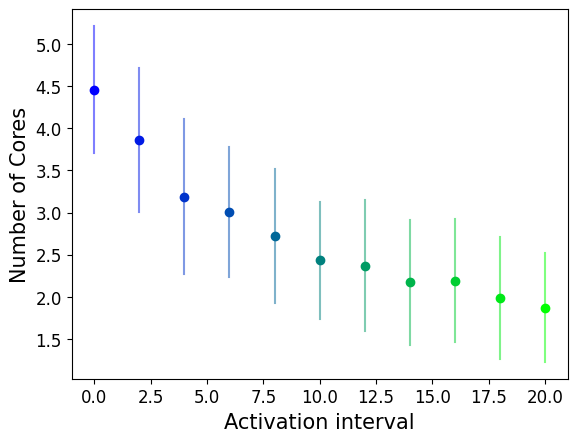

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Add a parameter for scaling font size
font_scale = 1.5

# Define a custom colormap transitioning from blue to green
colors = [(0, 0, 1), (0, 1, 0)]  # Blue to green
n_bins = 100  # Number of bins for smooth transition
cmap_name = "blue_to_green"
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

def get_color(value, min_value, max_value):
    """Get color based on value proportion between min_value and max_value."""
    return cmap((value - min_value) / (max_value - min_value))

# Read CSV data
df = pd.read_csv('simulation_outputs/simulation_log.csv')
Y_VAL = 'final_cell_count'
X_VAL = 'k'
ind_grouped = df.groupby(X_VAL)[Y_VAL]
ind_mean = ind_grouped.mean()
ind_std = ind_grouped.std()

# Plotting with gradual color change along the k axis
min_k, max_k = ind_mean.index.min(), ind_mean.index.max()

for k in ind_mean.index:
    color = get_color(k, min_k, max_k)
    plt.plot([k, k], [ind_mean[k] - ind_std[k], ind_mean[k] + ind_std[k]], color=color, alpha=0.5)  # Vertical lines for std
    plt.scatter([k], [ind_mean[k]], color=color, label=f"k={k}" if k == min_k else "")  # Points for mean

# Adding axis labels and a title for better readability with scaled font sizes
plt.xlabel('Activation interval', fontsize=10 * font_scale)
plt.ylabel('Number of Cores', fontsize=10 * font_scale)
plt.xticks(fontsize=8 * font_scale)
plt.yticks(fontsize=8 * font_scale)

# Display the plot
plt.show()


original view- single color

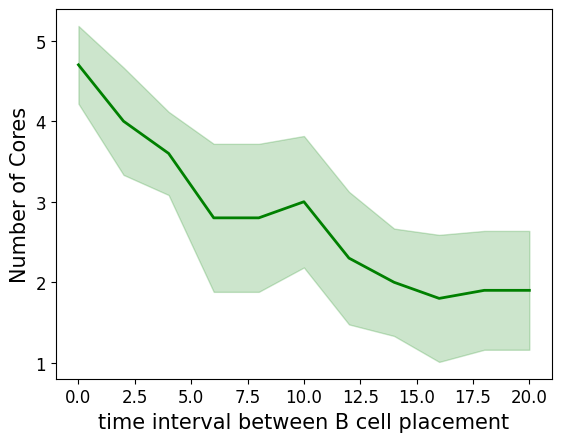

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add a parameter for scaling font size
font_scale = 1.5

# Read CSV data
df = pd.read_csv('simulation_outputs/simulation_log.csv')
Y_VAL = 'final_cell_count'
X_VAL = 'k'
ind_grouped = df.groupby(X_VAL)[Y_VAL]
ind_mean = ind_grouped.mean()
ind_std = ind_grouped.std()

plt.plot(ind_mean.index, ind_mean, color='green', label='Ind Mean', linewidth=2)
plt.fill_between(ind_mean.index, ind_mean - ind_std, ind_mean + ind_std, color='green', alpha=0.2, label='Ind Std')

# Adding axis labels and a title for better readability with scaled font sizes
plt.xlabel('time interval between B cell placement', fontsize=10 * font_scale)
plt.ylabel('Number of Cores', fontsize=10 * font_scale)
plt.xticks(fontsize=8 * font_scale)
plt.yticks(fontsize=8 * font_scale)

# Display the plot
plt.show()
